<a href="https://colab.research.google.com/github/Kei-Kobayash/multiple_smiles/blob/main/Temporal_permutation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Temporal permutation test

ある一つの電極に関して、時間帯を決める


## Importing libraries

In [ ]:
!pip install mne

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import mne

## Importing data and create df

In [ ]:
# Participants list

last_par_num = 10
excluded_pars = ["s2", "s4"]

participants = []

for n in range(1, last_par_num+1):
  participants.append("s" + str(n))

for excluded_par in excluded_pars:
  participants.remove(excluded_par)

print(participants)


# Importing participants' csv

for par, n in zip(participants, range(1, len(participants))):
  df = pd.read_csv(par + ".csv")
  df[n] = df

## Demo data

In [3]:
# Example data (participant = 10, time points = 100)
condition_1_demo_data = np.random.normal(loc=0, scale=1, size=(10, 100))
condition_2_demo_data = np.random.normal(loc=0.5, scale=1, size=(10, 100))

In [4]:
print(condition_1_demo_data[:3, :5])
print(condition_2_demo_data[:3, :5])

[[ 0.6213219   0.20614505  0.677279   -0.37595505 -0.22890776]
 [-0.58080206  1.22091356  0.74757423 -0.14205954  0.13182287]
 [-0.5510803   0.68018231  0.19067202 -0.12811555  0.76899429]]
[[ 1.42670009  0.80567151  0.0323269   0.92640265  0.19508717]
 [-0.43332709  0.7083388   0.8264606  -1.53468487 -1.30530051]
 [ 0.15441048  0.312076   -0.1779139  -0.56451589  0.66952885]]


## More realistic demo data

In [4]:
df_demo = pd.read_csv("smile_ERP_wo_s10.csv")
df_demo.head()

,time,chair_P7,chair_P8,smile0_P7,smile0_P8,smile1_P7,smile1_P8,smile2_P7,smile2_P8,smile3_P7,...,chair_PO7,chair_PO8,smile0_PO7,smile0_PO8,smile1_PO7,smile1_PO8,smile2_PO7,smile2_PO8,smile3_PO7,smile3_PO8
0,-100,0.1536,0.0204,0.2574,0.1986,0.2169,0.0775,0.1037,-0.0602,0.2317,...,0.0107,0.0569,0.2981,0.1433,0.1324,0.0104,0.0447,-0.1433,0.1859,0.1389
1,-96,0.1495,0.0896,0.2819,0.2422,0.2526,0.1038,0.1089,-0.0284,0.2074,...,0.0112,0.1657,0.3390,0.1671,0.1870,0.0732,0.0502,-0.0773,0.1688,0.1381
2,-92,0.1524,0.1686,0.3001,0.2873,0.2884,0.1372,0.0993,0.0020,0.1706,...,0.0215,0.2702,0.3752,0.2017,0.2508,0.1461,0.0411,-0.0188,0.1415,0.1325
3,-88,0.1615,0.2553,0.3055,0.3239,0.3212,0.1708,0.0783,0.0244,0.1269,...,0.0433,0.3658,0.3979,0.2401,0.3174,0.2162,0.0241,0.0200,0.1048,0.1271
4,-84,0.1733,0.3408,0.2939,0.3406,0.3483,0.1981,0.0525,0.0345,0.0842,...,0.0755,0.4471,0.3981,0.2714,0.3795,0.2711,0.0075,0.0336,0.0621,0.1261


In [19]:
# extract only one electrode (Here, let's extract P7)

filtered_df = df_demo[(df_demo["time"] >= 150) & (df_demo["time"] <= 250)]

demo_data_real_P8_smile1 = filtered_df["smile1_P8"]
demo_data_real_P8_smile3 = filtered_df["smile3_P8"]

demo_cond1 = demo_data_real_P8_smile1.to_list()
demo_cond2 = demo_data_real_P8_smile3.to_list()

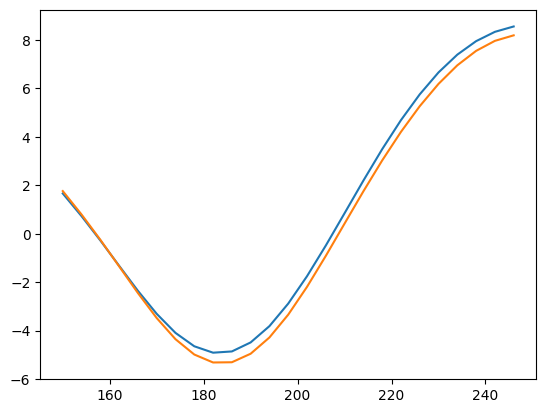

In [29]:
demo_data_real_P8_smile1.head()
demo_cond1

import matplotlib.pyplot as plt
plt.plot(np.arange(150, 250, 4), demo_cond1)
plt.plot(np.arange(150, 250, 4), demo_cond2)

In [ ]:
list_list1 = []
list_list2 = []

for n in range(10):
  sublist_1 = []
  sublist_2 = []
  for a, b in zip(demo_cond1, demo_cond2):
    num_1 = a + np.random.rand(1)
    num_2 = b + np.random.rand(1)
    sublist_1.append(num_1)
    sublist_2.append(num_2)
  list_list1.append(sublist_1)
  list_list2.append(sublist_2)

condition_1_demo_data = np.array(list_list1)
condition_2_demo_data = np.array(list_list2)

condition_1_demo_data

In [ ]:
# shape(10=N of participants * time_series)
demo_cond1 = demo_data_real_P8_smile1.to_list()
demo_cond2 = demo_data_real_P8_smile3.to_list()

condition_1_demo_data_real =
condition_2_demo_data_real =

print(condition_1_demo_data_real[:3, :5])
print(condition_2_demo_data_real[:3, :5])

## Real data


# ここのコード作成中！！！ ***********

In [ ]:
# Import each participant's csv (time * electrode) and add it to df_list (list of data frame)

df_list = []

for n in par_num:
  df[n] = pd.read_csv("")
  df_list.append(df[n])

# Now have a df_list that contains df (time * electrode) for each participant. For future use, I save it using pickle.
import pickle

with open('my_list.pkl', 'wb') as file:
    pickle.dump(df_list, file)

# To open it ... (maybe loaded df_list should be renamed as df_list)
with open('my_list.pkl', 'rb') as file:
    loaded_df_list = pickle.load(file)

# Extract specific time_range

cond1_list = []
cond2_list = []

t_min = 150
t_max = 250

for par in df_list:
  filtered_df = df_ttt[(df_ttt["time"] >= t_min) & (df_ttt["time"] <= t_max)]

  # Electrode & condition
  cond1_par = filtered_df["smile1_P8"].to_list
  cond2_par = filtered_df["smile3_P8"].to_list

  # Add this participant list to grand_list (containing all participants' list)
  cond1_list.append(cond1_par)
  cond2_list.append(cond2_par)

# Now, cond1_list is a list of list (i.e., 2d) and its shape is (participant, time point) for condition 1

# MNE python

https://mne.tools/stable/generated/mne.stats.permutation_cluster_1samp_test.html

In [39]:
# Xは、(n_observation, time_series)の型。The first dimension should correspond to the difference between paired samples (observations) in two conditions.
X = condition_1_demo_data - condition_2_demo_data

In [ ]:
print(X)

Text(0.5, 0, 'time')

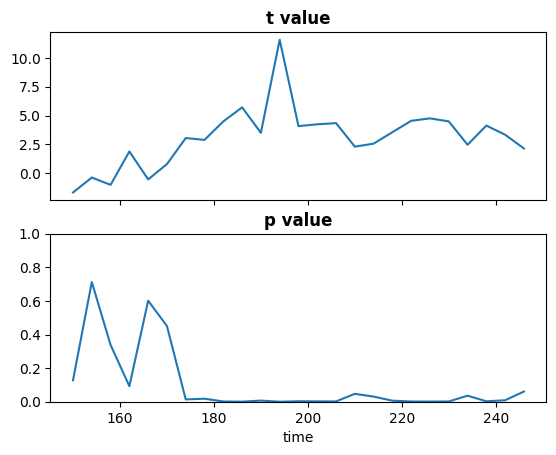

In [60]:
from scipy import stats

statistic = []
pvalue = []

for time_point in np.arange(150, 250, 4):
  statistic, pvalue = stats.ttest_rel(condition_1_demo_data, condition_2_demo_data)


fig, (ax1, ax2) = plt.subplots(2,1, sharex = True)
ax1.plot(np.arange(150, 250, 4), statistic)
ax1.set_title("t value", fontweight = "bold")

ax2.plot(np.arange(150, 250, 4), pvalue)
ax2.set_ylim(0, 1)
ax2.set_title("p value", fontweight = "bold")
ax2.set_xlabel('time')

In [41]:
t_obs, clusters, cluster_pv, H0 = mne.stats.permutation_cluster_1samp_test(X, n_permutations=10)

Using a threshold of 2.262157
stat_fun(H1): min=-1.677139 max=11.579225
Running initial clustering …
Found 1 cluster


  0%|          | Permuting : 0/9 [00:00<?,       ?it/s]

## Visualization

[[-1.67713916]
 [-0.38019622]
 [-1.01239552]
 [ 1.88212384]
 [-0.54175794]
 [ 0.7887397 ]
 [ 3.04739957]
 [ 2.88868544]
 [ 4.49052739]
 [ 5.71186632]
 [ 3.50283627]
 [11.57922493]
 [ 4.08106734]
 [ 4.24106056]
 [ 4.34270886]
 [ 2.30033891]
 [ 2.56258841]
 [ 3.55787095]
 [ 4.54297634]
 [ 4.75595295]
 [ 4.49399981]
 [ 2.46509117]
 [ 4.12842183]
 [ 3.33679682]
 [ 2.14369053]]
[(array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))]
[0.1]
[76.02941386  0.          0.          0.         -2.80377654 -3.02411107
  2.51000276 -2.47092578 -2.91349553  0.        ]


Text(0.5, 0, 'time')

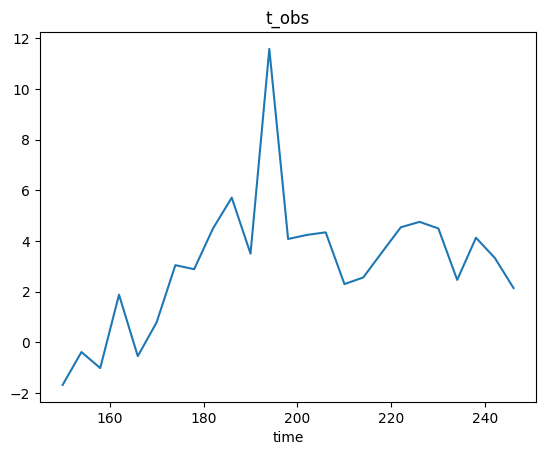

In [49]:
print(t_obs)
print(clusters)
print(cluster_pv)
print(H0)

import matplotlib.pyplot as plt
plt.plot(np.arange(150, 250, 4), t_obs)
plt.title("t_obs")
plt.xlabel("time")

In [46]:
print(cluster_pv)

[0.1]


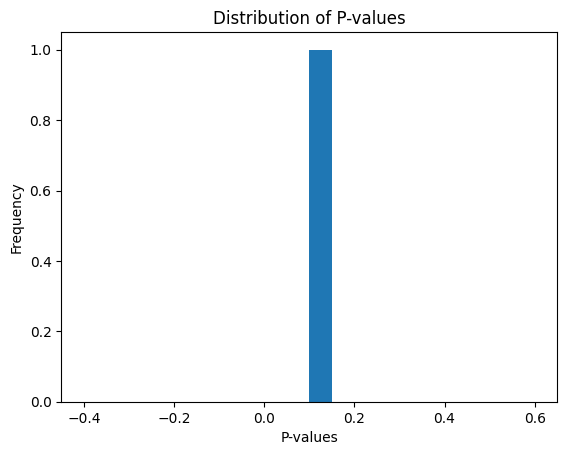

In [43]:
# Assuming p_values is a list of p-values
plt.hist(cluster_pv, bins=20)
plt.xlabel('P-values')
plt.ylabel('Frequency')
plt.title('Distribution of P-values')
plt.show()